In [1]:
#!pip freeze > ../requests.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading data

In [3]:
PATH1 = "../data/Desafio de Dados FieldPRO/Sensor_FieldPRO.csv"
PATH2 = "../data/Desafio de Dados FieldPRO/Estacao_Convencional.csv"

sensor_df = pd.read_csv(PATH1)
estacao_df = pd.read_csv(PATH2)

# Preprocessing

In [4]:
sensor_df.shape, sensor_df.columns

((1711, 7),
 Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
        'atm_pressure_main', 'num_of_resets', 'piezo_charge',
        'piezo_temperature'],
       dtype='object'))

In [5]:
estacao_df.shape, estacao_df.columns

((2256, 3), Index(['data', 'Hora (Brasília)', 'chuva'], dtype='object'))

In [6]:
sensor_df.isna().sum()
#sensor_df[sensor_df.air_humidity_100.isna()]
#sensor_df[sensor_df.num_of_resets.eq(3)]

Datetime – utc         0
air_humidity_100       6
air_temperature_100    6
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
dtype: int64

In [7]:
sensor_df[sensor_df['air_humidity_100'].isna()]

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature
1,2020-10-01T00:00:00Z,NaN,NaN,9412,0,45025,31
6,2020-10-01T05:00:00Z,NaN,NaN,9411,0,44537,30
12,2020-10-01T12:00:00Z,NaN,NaN,9438,0,43874,30
16,2020-10-01T16:00:00Z,NaN,NaN,9460,0,43259,30
20,2020-10-01T21:00:00Z,NaN,NaN,9379,0,41914,37
30,2020-10-02T08:00:00Z,NaN,NaN,9398,0,41083,19


In [8]:
sensor_df['data'] = pd.to_datetime(sensor_df['Datetime – utc'], format='mixed')

In [9]:
sensor_df['data'] = sensor_df.data.astype(str).str.split('+',expand=True)[0]

In [10]:
sensor_df.data

0       2020-09-30 23:00:00
1       2020-10-01 00:00:00
2       2020-10-01 01:00:00
3       2020-10-01 02:00:00
4       2020-10-01 03:00:00
               ...         
1706    2020-12-11 09:00:00
1707    2020-12-11 10:00:00
1708    2020-12-11 11:00:00
1709    2020-12-11 12:00:00
1710    2020-12-11 13:00:00
Name: data, Length: 1711, dtype: object

In [11]:
estacao_df.isna().sum()

data               0
Hora (Brasília)    0
chuva              0
dtype: int64

In [12]:
estacao_df['data'] = estacao_df.data + ' ' + estacao_df['Hora (Brasília)']

In [13]:
estacao_df

,data,Hora (Brasília),chuva
0,2020-09-01 00:00:00,00:00:00,0.0
1,2020-09-01 01:00:00,01:00:00,0.0
2,2020-09-01 02:00:00,02:00:00,0.0
3,2020-09-01 03:00:00,03:00:00,0.0
4,2020-09-01 04:00:00,04:00:00,0.0
...,...,...,...
2251,2020-12-03 19:00:00,19:00:00,0.0
2252,2020-12-03 20:00:00,20:00:00,0.0
2253,2020-12-03 21:00:00,21:00:00,0.0
2254,2020-12-03 22:00:00,22:00:00,0.0


In [14]:
dados_df = pd.merge(sensor_df,estacao_df[['data','chuva']], on='data')

In [15]:
dados_df[dados_df['air_humidity_100'].isna()]

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,data,chuva
1,2020-10-01T00:00:00Z,NaN,NaN,9412,0,45025,31,2020-10-01 00:00:00,0.0
6,2020-10-01T05:00:00Z,NaN,NaN,9411,0,44537,30,2020-10-01 05:00:00,0.0
12,2020-10-01T12:00:00Z,NaN,NaN,9438,0,43874,30,2020-10-01 12:00:00,0.0
16,2020-10-01T16:00:00Z,NaN,NaN,9460,0,43259,30,2020-10-01 16:00:00,0.0
19,2020-10-01T21:00:00Z,NaN,NaN,9379,0,41914,37,2020-10-01 21:00:00,0.0
29,2020-10-02T08:00:00Z,NaN,NaN,9398,0,41083,19,2020-10-02 08:00:00,0.0


When data are NaN there is no rain. As most of the data are no rain, this lines can be dropped with no significant loss of information.  

In [16]:
dados_df.dropna(inplace=True)

In [17]:
dados_df.chuva.unique()

array([ 0. ,  0.2,  1.2,  2.2,  9.2,  4. ,  0.4,  1.6,  0.8,  0.6,  3. ,
        1.8,  5.6,  2.4,  2.8, 16.8,  3.6,  4.2,  3.4,  2. ,  6.8,  6.2,
        3.8,  4.6,  1. , 15.2,  8.2])

# Descriptive Analyse
- The no-rain data shells the raining distribution (figure at left).
- In order to better see the distribution of raining data, the histogram is constructed ignoring the no-rain data (figure at right).

Text(0.5, 0, 'Rain')

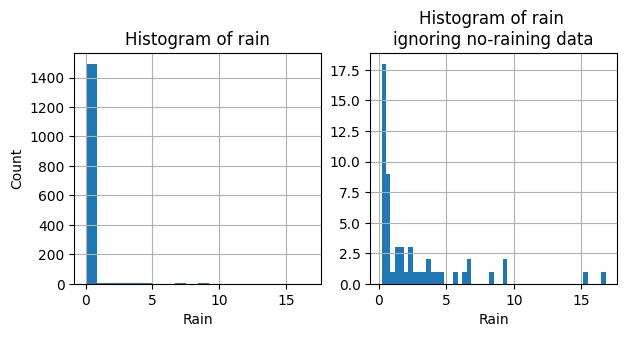

In [18]:
plt.subplots(1,2, figsize=(7,3))

plt.subplot(121)
dados_df.chuva.hist(bins=20)
plt.title('Histogram of rain')
plt.xlabel('Rain')
plt.ylabel('Count')

plt.subplot(122)
dados_df[~dados_df.chuva.eq(0)].chuva.hist(bins=50)
plt.title('Histogram of rain \nignoring no-raining data')
plt.xlabel('Rain')

- The figure at left shows there is a small difference between the temperature of the enviroment and the sensor
- The figure at right shows that any time the board is resetted, the charge of the condensator starts at its higest value
- Also, at right, it can be seen that only a tiny variation in the slope if the charge informates about the rain. A further treatment must be done in this variable.

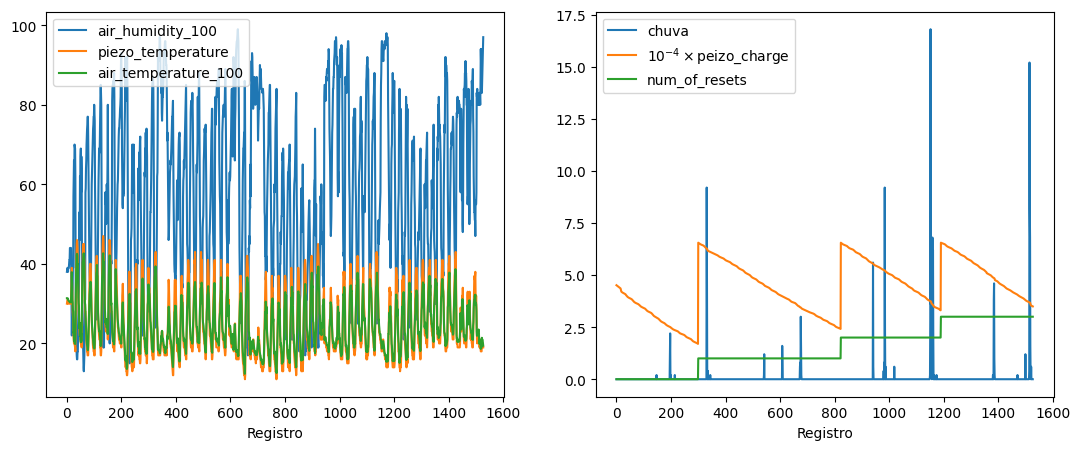

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13,5))

plt.subplot(121)
ax1.plot(dados_df[['air_humidity_100']], label='air_humidity_100')
ax1.plot(dados_df[['piezo_temperature']], label='piezo_temperature')
ax1.plot(dados_df[['air_temperature_100']], label='air_temperature_100')
plt.xlabel('Registro')
plt.legend()

plt.subplot(122)
ax2.plot(dados_df[['chuva']], label='chuva')
ax2.plot(dados_df[['piezo_charge']]/10000, label=r'$10^{-4}\times $peizo_charge')
ax2.plot(dados_df[['num_of_resets']], label='num_of_resets')
plt.xlabel('Registro')
plt.legend()


# Feature engeniering
In order to gain insight at how the sensor captates the information about the rain's behavior, is needed to perform some transformations.
- Most of infomation of the fluctuations of the signal is in the difference between two consecutive registres.
- The rooth squared mean $rms$ of the differences drift the signal to $0$
- An heuristic rescaling helps the interpretation.

In [20]:
# Warning! you must be carefull to run this cell twice without restarting the kernell
dados_df['dif_charge'] = dados_df.groupby('num_of_resets').piezo_charge.diff(-1)#.apply(np.log)
#dados_df['dif_charge'] = dados_df.groupby('num_of_resets').piezo_charge.diff(-1).apply(np.log)

dados_df['dif_charge'] = dados_df.dif_charge.shift(-2)
dados_df.dropna(inplace=True)
#dados_df['dif_charge'] = (100*dados_df['dif_charge']/dados_df['piezo_charge'])
rms = np.sqrt(dados_df.dif_charge.apply(lambda x: x**2).mean())
dados_df['dif_charge'] = (dados_df['dif_charge']-rms)#*5
rms

102.09575669742622

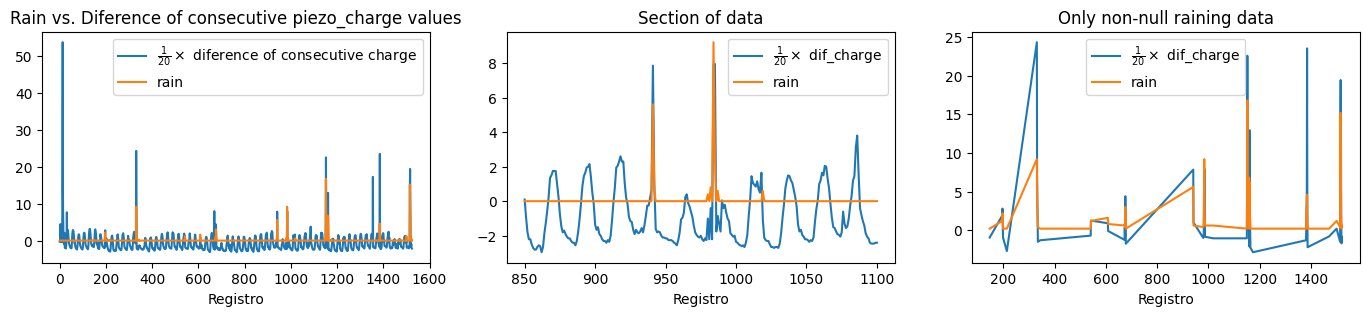

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,3))

plt.subplot(131)
ax1.plot(dados_df[['dif_charge']]/20, label=r'$\frac{1}{20}\times$ diference of consecutive charge')
ax1.plot(dados_df[['chuva']], label='rain')
plt.title('Rain vs. Diference of consecutive piezo_charge values')
plt.xlabel('Registro')
plt.legend()

plt.subplot(132)
ax2.plot(dados_df.loc[850:1100,['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax2.plot(dados_df.loc[850:1100].chuva, label='rain')
plt.title('Section of data')
plt.xlabel('Registro')
plt.legend()

plt.subplot(133)
ax3.plot(dados_df.loc[dados_df.chuva.gt(0),['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax3.plot(dados_df.loc[dados_df.chuva.gt(0),['chuva']], label='rain')
plt.title('Only non-null raining data')
plt.xlabel('Registro')
plt.legend()


In [22]:
dados_df[['piezo_temperature','air_temperature_100']]
dados_df['dif_temp'] = dados_df['air_temperature_100'] - dados_df['piezo_temperature'].astype(float)

In [23]:
dados_df['dq/dT'] = (dados_df.dif_charge/dados_df.dif_temp)
dados_df['dq/dT'] = (dados_df.dif_charge/dados_df.dif_temp)

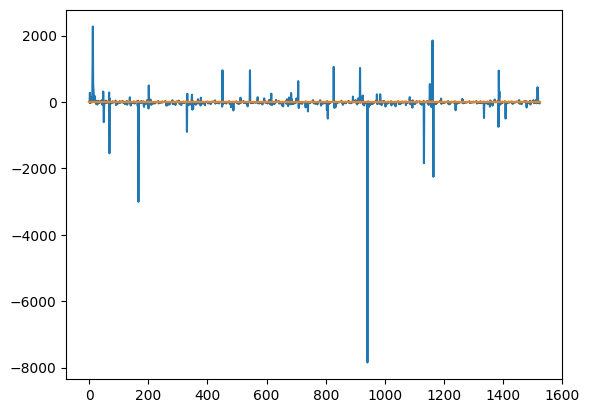

In [24]:
plt.plot(dados_df['dq/dT'])
plt.plot(dados_df['chuva'])

- The rain is also represented by a two-valued variable to separate the non-raining data to these of raining data

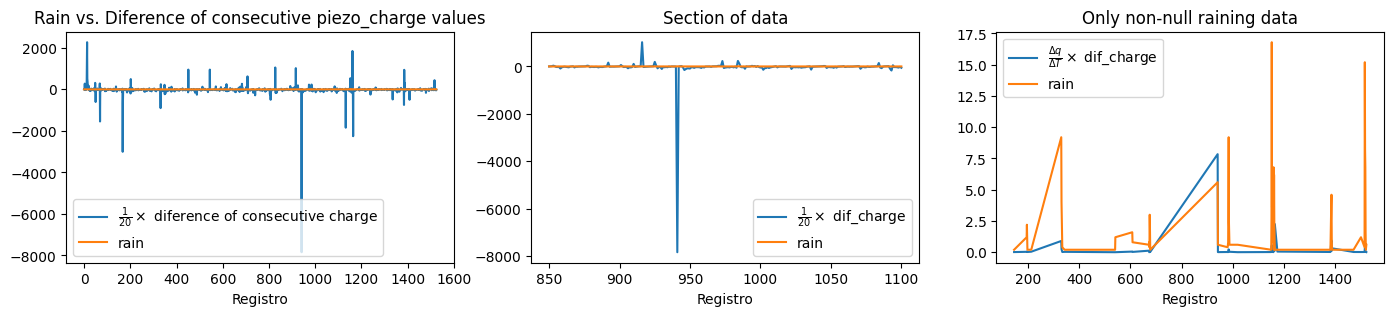

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,3))

plt.subplot(131)
ax1.plot(dados_df[['dq/dT']], label=r'$\frac{1}{20}\times$ diference of consecutive charge')
ax1.plot(dados_df[['chuva']], label='rain')
plt.title('Rain vs. Diference of consecutive piezo_charge values')
plt.xlabel('Registro')
plt.legend()

plt.subplot(132)
ax2.plot(dados_df.loc[850:1100,['dq/dT']], label=r'$\frac{1}{20}\times$ dif_charge')
ax2.plot(dados_df.loc[850:1100].chuva, label='rain')
plt.title('Section of data')
plt.xlabel('Registro')
plt.legend()

plt.subplot(133)
ax3.plot(np.abs(dados_df.loc[dados_df.chuva.gt(0),['dq/dT']])/1000, label=r'$\frac{\Delta q}{\Delta T}\times$ dif_charge')
ax3.plot(dados_df.loc[dados_df.chuva.gt(0),['chuva']], label='rain')
plt.title('Only non-null raining data')
plt.xlabel('Registro')
plt.legend()


In [26]:
dados_df['precp'] = dados_df.chuva.apply(lambda x: 0 if x==0.0 else 1)
#dados_df['precp'] = dados_df.chuva.apply(lambda x: 0 if x==0.0 else 1 if x<=2.5 else 2 if x<=5 else 3)

In [27]:
dados_df

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,data,chuva,dif_charge,dif_temp,dq/dT,precp
0,2020-09-30T23:00:00Z,38.0,31.366,9412,0,45123,30,2020-09-30 23:00:00,0.0,-5.095757,1.366,-3.730422,0
2,2020-10-01T01:00:00Z,39.0,31.366,9419,0,44923,31,2020-10-01 01:00:00,0.0,-6.095757,0.366,-16.655073,0
3,2020-10-01T02:00:00Z,39.0,31.322,9419,0,44825,31,2020-10-01 02:00:00,0.0,88.904243,0.322,276.100134,0
4,2020-10-01T03:00:00Z,38.0,31.240,9416,0,44728,31,2020-10-01 03:00:00,0.0,-8.095757,0.240,-33.732320,0
5,2020-10-01T04:00:00Z,39.0,30.828,9411,0,44632,30,2020-10-01 04:00:00,0.0,-6.095757,0.828,-7.362025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,2020-12-03T16:00:00Z,94.0,18.900,9440,3,35492,18,2020-12-03 16:00:00,0.0,-32.095757,0.900,-35.661952,0
1521,2020-12-03T17:00:00Z,90.0,19.700,9420,3,35355,18,2020-12-03 17:00:00,0.6,-17.095757,1.700,-10.056327,1
1522,2020-12-03T18:00:00Z,83.0,21.420,9413,3,35287,20,2020-12-03 18:00:00,0.0,-38.095757,1.420,-26.827998,0
1523,2020-12-03T19:00:00Z,86.0,20.880,9412,3,35217,20,2020-12-03 19:00:00,0.0,-41.095757,0.880,-46.699724,0


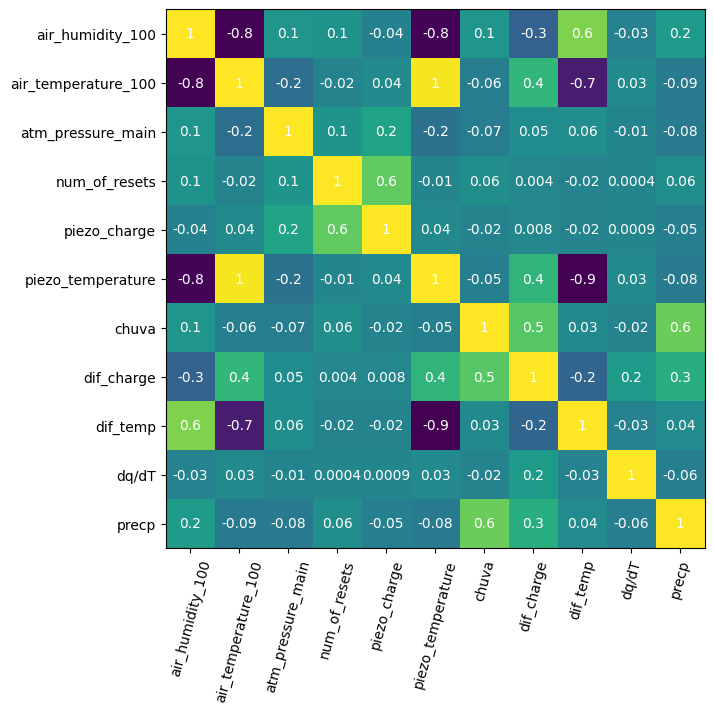

In [28]:
labels = np.array(dados_df.drop(['Datetime – utc', 'data'], axis=1).corr().columns)
heatmap = dados_df.drop(['Datetime – utc', 'data'], axis=1).corr().to_numpy()
n = len(heatmap)

fig, ax = plt.subplots(figsize=(7,7))

ax.imshow(heatmap)

ax.set_yticks(np.arange(n), labels=labels)
ax.set_xticks(np.arange(n), labels=labels, rotation=75)

for l in range(n):
    for k in range(n):
        annot = f'{heatmap[k,l]:.1g}'
        ax.text(k, l, annot, ha='center', va='center', color='w')

#fig.show()


# Calibrator
## Classification
Due to the huge quantity of non raining values a classification model is first fitted.

In [29]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor, XGBClassifier
from hyperopt import STATUS_OK, fmin, tpe, hp, Trials

In [30]:
dados_df.columns

Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets', 'piezo_charge',
       'piezo_temperature', 'data', 'chuva', 'dif_charge', 'dif_temp', 'dq/dT',
       'precp'],
      dtype='object')

In [31]:
cols = ['air_humidity_100', 'atm_pressure_main', 'air_temperature_100',
        'dif_charge', 'dif_temp',
        'precp']

In [32]:
X = dados_df[cols].copy()
y = X.pop('precp')

In [33]:
X.columns

Index(['air_humidity_100', 'atm_pressure_main', 'air_temperature_100',
       'dif_charge', 'dif_temp'],
      dtype='object')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
models = {'LogisticRegression':LogisticRegression, 'RandomForestClassifier':RandomForestClassifier, 'XGBClassifier':XGBClassifier}

In [36]:
for model in models:
    print(model)
    md = models[model]()
    #print(md)
    md.fit(X_train, y_train)
    #print('score: ', md.score(X_train,y_train), md.score(X_test,y_test))
    print(classification_report(y_test, md.predict(X_test)))


LogisticRegression
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       438
           1       1.00      0.06      0.11        17

    accuracy                           0.96       455
   macro avg       0.98      0.53      0.55       455
weighted avg       0.97      0.96      0.95       455

RandomForestClassifier


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       438
           1       0.60      0.18      0.27        17

    accuracy                           0.96       455
   macro avg       0.78      0.59      0.63       455
weighted avg       0.96      0.96      0.96       455

XGBClassifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       438
           1       0.70      0.41      0.52        17

    accuracy                           0.97       455
   macro avg       0.84      0.70      0.75       455
weighted avg       0.97      0.97      0.97       455



### Bootstrap Regressor

In [37]:
X_bst = pd.concat([X_train, y_train], axis=1)

In [38]:
N = 500

In [39]:
X_bst = pd.concat([X_bst,X_bst[X_bst.precp.eq(1)].sample(n=N, replace=True)])

In [40]:
y_train = X_bst.pop('precp')
X_train = X_bst

In [41]:
for model in models:
    print(model)
    md = models[model]()
    #print(md)
    md.fit(X_train, y_train)
    #print('score: ', md.score(X_train,y_train), md.score(X_test,y_test))
    print(classification_report(y_test, md.predict(X_test)))


LogisticRegression
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       438
           1       0.35      0.47      0.40        17

    accuracy                           0.95       455
   macro avg       0.66      0.72      0.69       455
weighted avg       0.96      0.95      0.95       455

RandomForestClassifier


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       438
           1       0.67      0.35      0.46        17

    accuracy                           0.97       455
   macro avg       0.82      0.67      0.72       455
weighted avg       0.96      0.97      0.96       455

XGBClassifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       438
           1       0.64      0.41      0.50        17

    accuracy                           0.97       455
   macro avg       0.81      0.70      0.74       455
weighted avg       0.96      0.97      0.97       455



## Regressor
- The fine tuning of the model is made with a regression model of the raining data

In [42]:
dados_df.columns

Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets', 'piezo_charge',
       'piezo_temperature', 'data', 'chuva', 'dif_charge', 'dif_temp', 'dq/dT',
       'precp'],
      dtype='object')

In [43]:
cols = ['air_humidity_100', 'air_temperature_100', 
        'piezo_temperature', 
        'dif_charge', 'dif_temp', 'dq/dT',
        'chuva']

In [44]:
X = dados_df.loc[dados_df.chuva.gt(0), cols].copy()
y = X.pop('chuva')

In [45]:
X.columns

Index(['air_humidity_100', 'air_temperature_100', 'piezo_temperature',
       'dif_charge', 'dif_temp', 'dq/dT'],
      dtype='object')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [47]:
RFNorm = make_pipeline(StandardScaler(),RandomForestRegressor())
SGD = make_pipeline(StandardScaler(),SGDRegressor())

models = {'LinearRregression':LinearRegression(),'Lasso':Lasso(), 'SGD':SGD,
          'RandomForestRegressor':RandomForestRegressor(), 'RandomForestNormalized':RFNorm, 'XGBRegressor':XGBRegressor(),
          'SVR':SVR()}

In [48]:
for model in models:
    md = models[model]
    cvs = cross_validate(md, X=X, y=y, cv=7, scoring=('neg_mean_squared_error','r2'))
    print(model + f': {cvs["test_r2"].mean():.2f}')
    md.fit(X_train, y_train)
    print(md.score(X_train, y_train), md.score(X_test, y_test))
    #print(cvs['test_r2'])


LinearRregression: 0.15
0.758153360744938 -0.49360781146067856
Lasso: 0.31
0.7564015708928316 -0.337790265429577
SGD: 0.30
0.7553834976130581 0.28298635220594814


RandomForestRegressor: 0.31
0.9401555199373459 0.7245675473941477
RandomForestNormalized: 0.37
0.9282971773102193 0.7539932739943195
XGBRegressor: 0.38
0.9999999662542963 0.6071652570484101
SVR: 0.16
0.6697832324783448 0.5403156882257727


### Hyperparameter optimization

In [49]:
seed = 42
def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    msl=int(params['min_samples_leaf'])
    mss=int(params['min_samples_split'])
    model=RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    score=mean_squared_error(y_test,pred)
    score=-r2_score(y_test,pred)
    return score
    
def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=500,rstate=np.random.default_rng(seed))
    return best

trial=Trials()
best_param=optimize(trial)


100%|██████████| 500/500 [01:51<00:00,  4.49trial/s, best loss: -0.8116794076440117]


In [50]:
for a in best_param.items():
    best_param[a[0]] = int(a[1])

best_param


{'max_depth': 16,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 107}

In [51]:
#best_param#.score(X_test,y_test), best.score(X_train,y_train)
best_RF = RandomForestRegressor(**best_param)

In [52]:
best_RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=16, min_samples_leaf=4, min_samples_split=3,
                      n_estimators=107)

In [53]:
best_RF.score(X_train,y_train), best_RF.score(X_test,y_test)

(0.741253069658588, 0.7627566963316774)

In [54]:
cvs = cross_validate(best_RF, X=X, y=y, cv=7, scoring=('neg_mean_squared_error','r2'))
print(f'best_RF: {cvs["test_r2"].mean():.2f}')

best_RF: 0.51
